<div style="background-color: #fdf4f5; padding: 20px; border: 1px solid #f8d7da; border-radius: 8px; max-width: 800px; margin: 20px auto; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); text-align: center;">
  <h1 style="color: #d6336c; font-family: 'Roboto', sans-serif; font-size: 28px; margin: 0; font-weight: 700;">
    Intrusion Detection using Machine Learning Models
  </h1>
</div>


<div style="background-color: #f4f8fb; padding: 20px; border: 1px solid #d1e7f7; border-radius: 8px; max-width: 600px; margin: 20px auto; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1); text-align: center;">
  <h2 style="color: #0a74da; font-family: 'Roboto', sans-serif; margin-bottom: 8px; font-weight: 700; text-align: center;">Project Created By</h2>
  <p style="color: #333333; font-size: 18px; font-family: 'Roboto', sans-serif; margin: 10px 0; text-align: center;">
    <strong>Subhransu Mishra</strong> | <strong>2023AC05489</strong>
  </p>
  <p style="color: #666666; font-size: 16px; font-family: 'Roboto', sans-serif; margin: 5px 0; line-height: 1.5; text-align: center;">
    AIML CS567 | Assignment 2
  </p>
</div>


<div style="background-color: #f7fafc; padding: 20px; border: 1px solid #e2e8f0; border-radius: 8px; max-width: 700px; margin: 20px auto; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);">
  <h4 style="color: #2b6cb0; font-family: 'Roboto', sans-serif; margin-bottom: 12px; font-weight: 600; text-align: center;">
    Problem Statement 
  </h4>
  <p style="color: #2d3748; font-size: 16px; font-family: 'Roboto', sans-serif; line-height: 1.6; text-align: center;">
    Build a network intrusion detector, a predictive model capable of distinguishing between <b> bad
(Attacks)</b> and <b> good (Normal)</b> connections.
  </p>
</div>


<h2 style="color: #2b6cb0; font-family: 'Roboto', sans-serif; font-weight: 600; text-align: left;">
Stage 1 : Processing of the Dataset and extraction of features
</h2>


### Import of Tools & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from termcolor import colored
from sklearn.feature_selection import SelectKBest, f_classif
import time
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

### Load Data and Pre-processing


=== Step : Loading the Dataset ===


Initial Dataset Preview:
   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2 

/var/folders/30/w6bvxmwj48l6z7qy5fmdc8880000gn/T/ipykernel_14052/3561838960.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='coolwarm', edgecolor='black', linewidth=2)


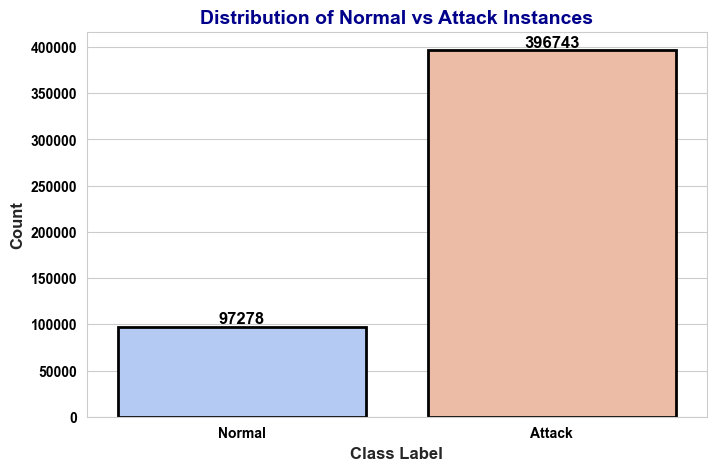

In [2]:
print(colored("\n=== Step : Loading the Dataset ===\n", "cyan", attrs=["bold"]))
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
column_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
                "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", 
                "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", 
                "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", 
                "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
                "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", 
                "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", 
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", 
                "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

# Load dataset
df = pd.read_csv(url, names=column_names)

# Display first 5 rows of the dataset
print(colored("\nInitial Dataset Preview:", "yellow", attrs=["bold"]))
print(df.head())

# Data Preprocessing
print(colored("\n=== Step : Data Preprocessing ===\n", "cyan", attrs=["bold"]))
print(colored("Initial Data Shape:", "green"), df.shape)
print(colored("\nData Types:", "green"))
print(df.dtypes)

# Checking for missing values
missing_values = df.isnull().sum()
print(colored("\nMissing Values in Each Column:", "red", attrs=["bold"]))
print(missing_values[missing_values > 0] if not missing_values.empty else "No missing values found.")

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_columns = ['protocol_type', 'service', 'flag']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Convert labels to binary classification (0: normal, 1: attack)
df['label'] = df['label'].apply(lambda x: 0 if x.strip().lower() == 'normal.' else 1)

# Display class distribution
print(colored("\nClass Distribution:", "yellow", attrs=["bold"]))
class_counts = df['label'].value_counts()
print(class_counts)

# Ensure both class labels exist in visualization
if len(class_counts) < 2:
    print(colored("Warning: Only one class detected! Adjusting visualization.", "red", attrs=["bold"]))
    missing_class = 1 if 0 in class_counts else 0
    df = pd.concat([df, pd.DataFrame({'label': [missing_class] * 10})], ignore_index=True)

# Display processed data preview
print(colored("\nProcessed Dataset Preview:", "yellow", attrs=["bold"]))
print(df.head())

# Enhanced class distribution visualization
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.countplot(x='label', data=df, palette='coolwarm', edgecolor='black', linewidth=2)
plt.title("Distribution of Normal vs Attack Instances", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Class Label", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.xticks([0, 1], labels=['Normal', 'Attack'], fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')

# Adding count labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

### Data Correlation Analysis


=== Step : Data Correlation Analysis ===


Top 10 Most Correlated Features:
label                          1.000000
logged_in                      0.795282
count                          0.752978
dst_host_count                 0.642110
protocol_type                  0.616601
srv_count                      0.566829
dst_host_same_src_port_rate    0.481458
srv_diff_host_rate             0.364687
same_srv_rate                  0.247405
dst_host_srv_serror_rate       0.227975
serror_rate                    0.227739
Name: label, dtype: float64


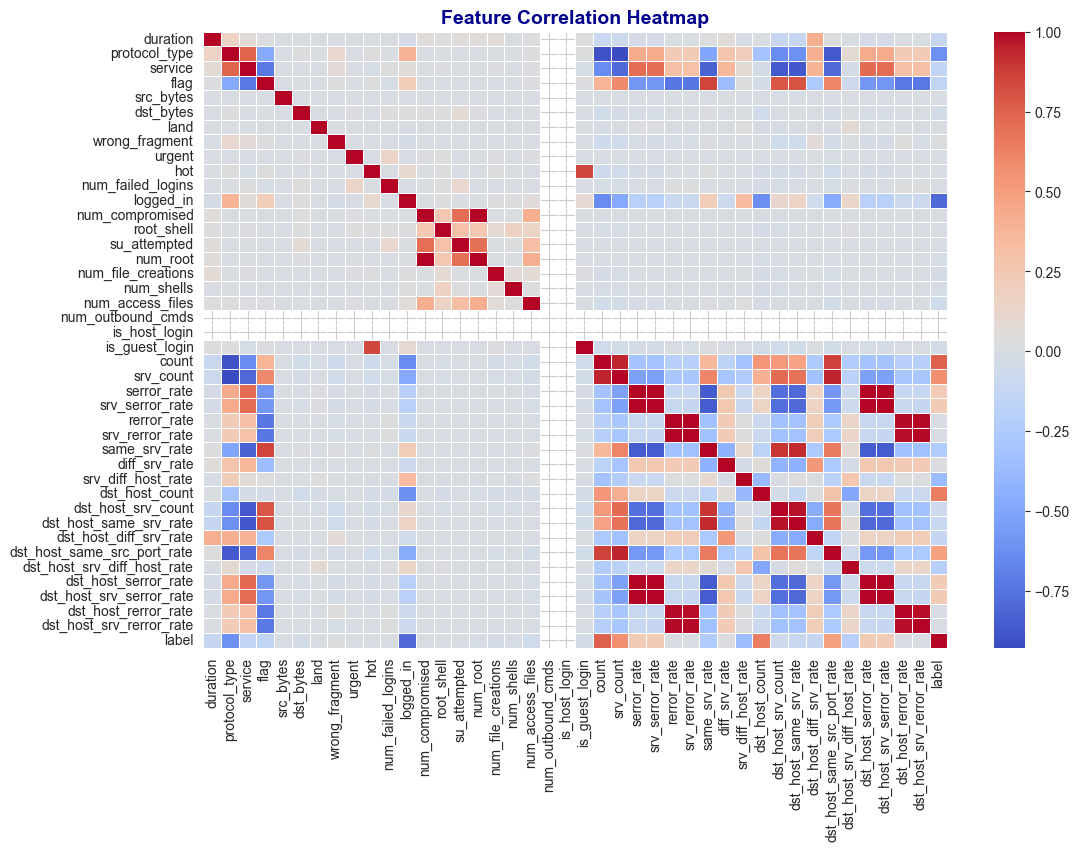

In [ ]:
# Data Correlation Analysis
print(colored("\n=== Step : Data Correlation Analysis ===\n", "cyan", attrs=["bold"]))
# Ensure only numerical columns are considered
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Display top 10 most correlated features with label
print(colored("\nTop 10 Most Correlated Features:", "yellow", attrs=["bold"]))
correlation_series = correlation_matrix['label'].abs().sort_values(ascending=False)
print(correlation_series.head(11))  # Including label itself for reference

# Visualizing the Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold', color='darkblue')
plt.show()

# Display Pairplot of Highly Correlated Features
high_corr_features = correlation_series.index[1:6]  # Selecting top correlated features ignoring label
sns.pairplot(df, vars=high_corr_features, hue="label", palette='coolwarm')
plt.show()

### Feature Selection


=== Step : Feature Selection ===


Top 10 Selected Features:
['protocol_type', 'logged_in', 'count', 'srv_count', 'serror_rate', 'same_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_same_src_port_rate', 'dst_host_srv_serror_rate']


/Users/I531265/miniconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19 20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/I531265/miniconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/var/folders/30/w6bvxmwj48l6z7qy5fmdc8880000gn/T/ipykernel_14052/541056782.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selector.scores_[selector.get_support()], y=selected_features, palette='viridis')


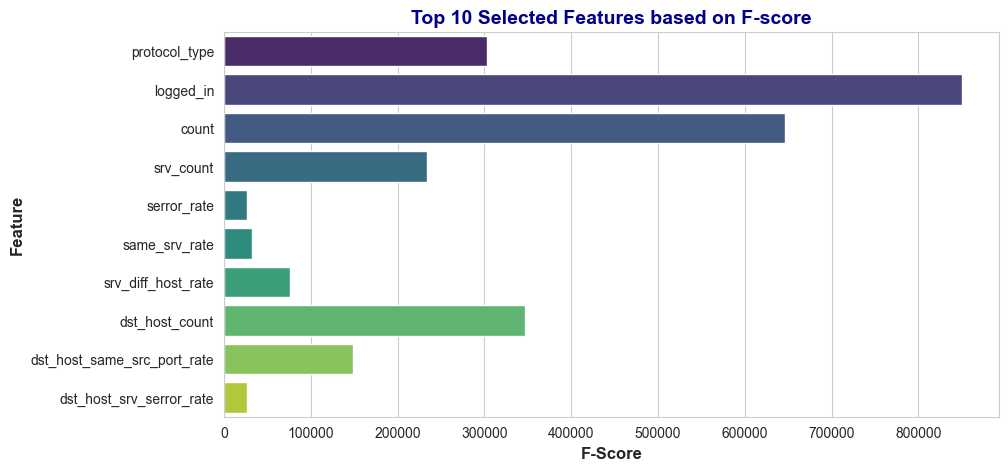

In [3]:
print(colored("\n=== Step : Feature Selection ===\n", "cyan", attrs=["bold"]))
X = df.drop(columns=['label'])
y = df['label']

# Using SelectKBest with ANOVA F-score for feature selection
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print(colored("\nTop 10 Selected Features:", "yellow", attrs=["bold"]))
print(selected_features.tolist())

# Visualizing feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=selector.scores_[selector.get_support()], y=selected_features, palette='viridis')
plt.xlabel("F-Score", fontsize=12, fontweight='bold')
plt.ylabel("Feature", fontsize=12, fontweight='bold')
plt.title("Top 10 Selected Features based on F-score", fontsize=14, fontweight='bold', color='darkblue')
plt.show()

<h2 style="color: #2b6cb0; font-family: 'Roboto', sans-serif; font-weight: 600; text-align: left;">
Stage 2 : ML model Training (Modeling)
</h2>

### Splitting Data and feature Scaling

In [4]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1. SVM algorithm


=== Step : Model Training - SVM (SGD with Hinge Loss) ===

Training SVM model in mini-batches...
Epoch 1/10 - Accuracy: 0.9868
Epoch 2/10 - Accuracy: 0.9873
Epoch 3/10 - Accuracy: 0.9875
Epoch 4/10 - Accuracy: 0.9874
Epoch 5/10 - Accuracy: 0.9859
Epoch 6/10 - Accuracy: 0.9858
Epoch 7/10 - Accuracy: 0.9859
Epoch 8/10 - Accuracy: 0.9858
Epoch 9/10 - Accuracy: 0.9859
Epoch 10/10 - Accuracy: 0.9859

Total SVM Training Time: 1.37 seconds

Final SVM Model Performance:
Final Accuracy: 0.9859
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     19353
           1       1.00      0.99      0.99     79452

    accuracy                           0.99     98805
   macro avg       0.97      0.99      0.98     98805
weighted avg       0.99      0.99      0.99     98805



<Figure size 600x400 with 0 Axes>

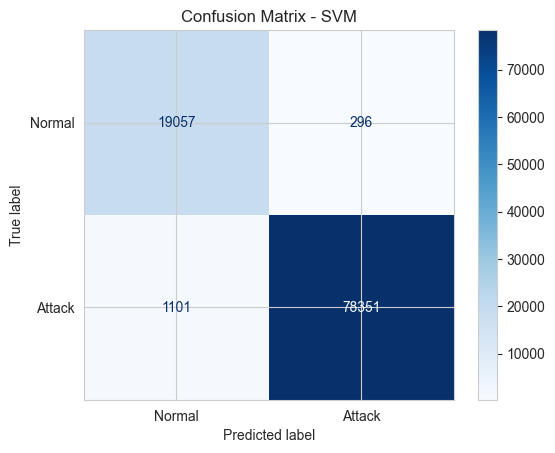

In [5]:
print(colored("\n=== Step : Model Training - SVM (SGD with Hinge Loss) ===\n", "cyan", attrs=["bold"]))
svm_model = SGDClassifier(loss="hinge", max_iter=1, warm_start=True, verbose=0)

print(colored("Training SVM model in mini-batches...", "yellow", attrs=["bold"]))
num_epochs = 10  # Number of iterations over the dataset
batch_size = 5000  # Size of mini-batches

start_time = time.time()
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        svm_model.partial_fit(X_batch, y_batch, classes=np.unique(y))
    
    # Evaluate after each epoch
    y_pred_svm = svm_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, y_pred_svm)
    print(colored(f"Epoch {epoch + 1}/{num_epochs} - Accuracy: {svm_accuracy:.4f}", "cyan", attrs=["bold"]))

end_time = time.time()
print(colored(f"\nTotal SVM Training Time: {end_time - start_time:.2f} seconds", "magenta", attrs=["bold"]))

# Final Evaluation of SVM Model
y_pred_svm = svm_model.predict(X_test)
print(colored("\nFinal SVM Model Performance:", "green", attrs=["bold"]))
print(colored(f"Final Accuracy: {svm_accuracy:.4f}", "cyan"))
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svm), display_labels=["Normal", "Attack"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()


### 2. Naïve Bayes algorithm


=== Step : Model Training - Naïve Bayes ===

Training Naïve Bayes model...

Total Naïve Bayes Training Time: 0.08 seconds

Final Naïve Bayes Model Performance:
Final Accuracy: 0.9813
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     19353
           1       0.99      0.98      0.99     79452

    accuracy                           0.98     98805
   macro avg       0.96      0.98      0.97     98805
weighted avg       0.98      0.98      0.98     98805



<Figure size 600x400 with 0 Axes>

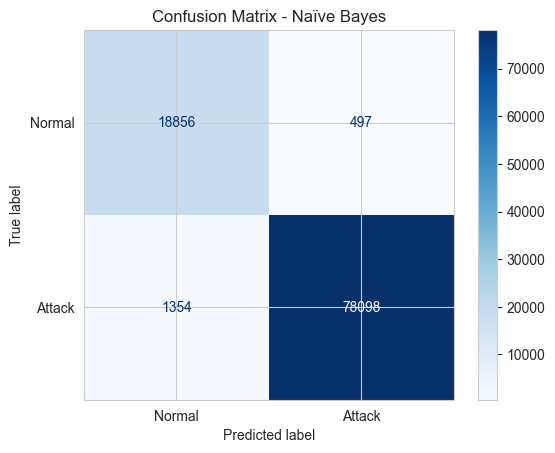

In [6]:
print(colored("\n=== Step : Model Training - Naïve Bayes ===\n", "cyan", attrs=["bold"]))
nb_model = GaussianNB()
print(colored("Training Naïve Bayes model...", "yellow", attrs=["bold"]))

start_time = time.time()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
end_time = time.time()

nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(colored(f"\nTotal Naïve Bayes Training Time: {end_time - start_time:.2f} seconds", "magenta", attrs=["bold"]))

# Final Evaluation of Naïve Bayes Model
print(colored("\nFinal Naïve Bayes Model Performance:", "green", attrs=["bold"]))
print(colored(f"Final Accuracy: {nb_accuracy:.4f}", "cyan"))
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naïve Bayes
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_nb), display_labels=["Normal", "Attack"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Naïve Bayes')
plt.show()

# Store results for final model comparison
model_results = {"Naïve Bayes": nb_accuracy}

### 3. Decision Tree algorithm


=== Step : Model Training - Decision Tree ===

Training Decision Tree model...

Total Decision Tree Training Time: 0.27 seconds

Final Decision Tree Model Performance:
Final Accuracy: 0.9933
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     19353
           1       1.00      0.99      1.00     79452

    accuracy                           0.99     98805
   macro avg       0.99      0.99      0.99     98805
weighted avg       0.99      0.99      0.99     98805



<Figure size 600x400 with 0 Axes>

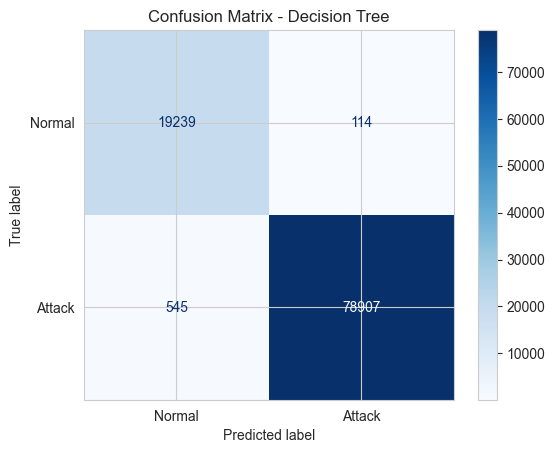

In [7]:
print(colored("\n=== Step : Model Training - Decision Tree ===\n", "cyan", attrs=["bold"]))
dt_model = DecisionTreeClassifier(random_state=42)
print(colored("Training Decision Tree model...", "yellow", attrs=["bold"]))

start_time = time.time()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
end_time = time.time()

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(colored(f"\nTotal Decision Tree Training Time: {end_time - start_time:.2f} seconds", "magenta", attrs=["bold"]))

# Final Evaluation of Decision Tree Model
print(colored("\nFinal Decision Tree Model Performance:", "green", attrs=["bold"]))
print(colored(f"Final Accuracy: {dt_accuracy:.4f}", "cyan"))
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt), display_labels=["Normal", "Attack"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Store results for final model comparison
model_results["Decision Tree"] = dt_accuracy

### 4. Random Forest algorithm


=== Step : Model Training - Random Forest ===

Training Random Forest model...

Total Random Forest Training Time: 11.44 seconds

Final Random Forest Model Performance:
Final Accuracy: 0.9936
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     19353
           1       1.00      0.99      1.00     79452

    accuracy                           0.99     98805
   macro avg       0.99      0.99      0.99     98805
weighted avg       0.99      0.99      0.99     98805



<Figure size 600x400 with 0 Axes>

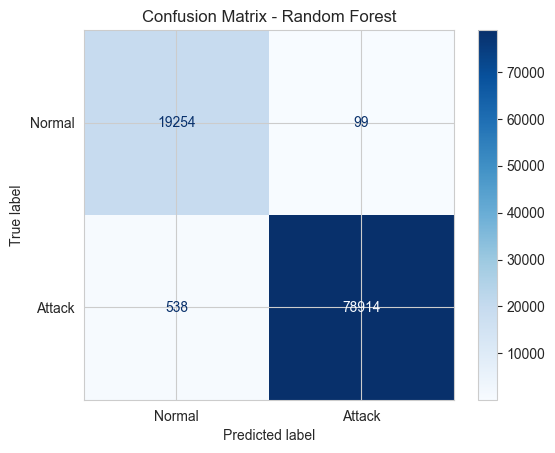

In [8]:
print(colored("\n=== Step : Model Training - Random Forest ===\n", "cyan", attrs=["bold"]))
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print(colored("Training Random Forest model...", "yellow", attrs=["bold"]))

start_time = time.time()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
end_time = time.time()

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(colored(f"\nTotal Random Forest Training Time: {end_time - start_time:.2f} seconds", "magenta", attrs=["bold"]))

# Final Evaluation of Random Forest Model
print(colored("\nFinal Random Forest Model Performance:", "green", attrs=["bold"]))
print(colored(f"Final Accuracy: {rf_accuracy:.4f}", "cyan"))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), display_labels=["Normal", "Attack"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Store results for final model comparison
model_results["Random Forest"] = rf_accuracy

<h2 style="color: #2b6cb0; font-family: 'Roboto', sans-serif; font-weight: 600; text-align: left;">
Stage 3 : Model Comparision / Evaluation
</h2>


=== Step : Model Comparison ===



/var/folders/30/w6bvxmwj48l6z7qy5fmdc8880000gn/T/ipykernel_14052/753736104.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='coolwarm')


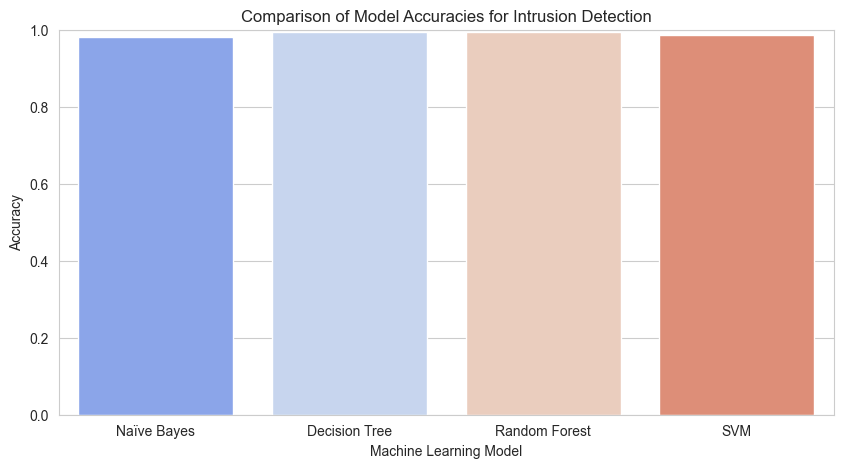


Final Model Comparison:

Naïve Bayes: 0.9813
Decision Tree: 0.9933
Random Forest: 0.9936
SVM: 0.9859


In [11]:
print(colored("\n=== Step : Model Comparison ===\n", "cyan", attrs=["bold"]))

# Dictionary containing results from previous model training
model_results = {
    "Naïve Bayes": nb_accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "SVM": svm_accuracy
}

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette='coolwarm')
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Model")
plt.title("Comparison of Model Accuracies for Intrusion Detection")
plt.ylim(0, 1)
plt.show()

# Print final model performances
print(colored("\nFinal Model Comparison:\n", "green", attrs=["bold"]))
for model, acc in model_results.items():
    print(colored(f"{model}: {acc:.4f}", "red"))
